In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 將所有樣本分成兩類——1（陽性樣本）、0（陰性樣本）
y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
# 拆分數據集
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_log_pred = log_reg.predict(X_test) # 對測試樣本進行預測

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


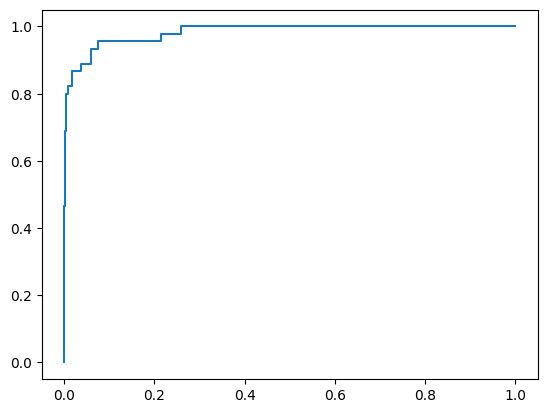

In [7]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
pred_probs = log_reg.predict_proba(X_test)
fprs, tprs, thresholds = roc_curve(y_test, pred_probs[:,1])
plt.plot(fprs, tprs)
plt.show()